<a href="https://colab.research.google.com/github/agrawalsourabh/DeepLearning/blob/master/Handwritten_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# MNIST Database of Handwritten Digits

**Learning Objective:** </br>
* Load data form keras
* Configure model
* Built a model
* Use Callbacks
* Evaluate the model

In [0]:
# Importing packages
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.datasets import mnist

**Load the data**

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()



**Examine the data**

In [62]:
# print shape of the data

print("Train data - Features: ", x_train.shape)
print("Train data - Target: ", y_train.shape)

print("Test data - Features: ", x_test.shape)
print("Test data - Features: ", y_test.shape)

Train data - Features:  (60000, 28, 28)
Train data - Target:  (60000,)
Test data - Features:  (10000, 28, 28)
Test data - Features:  (10000,)


In [0]:
x_train[1]

**Visualise the data**

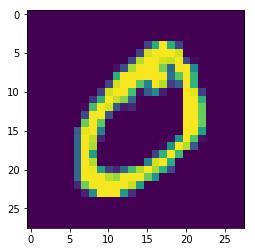

In [43]:
plt.imshow(x_train[1])

**Normalise the data** </br>
By dividing the training and testing data by 255

In [0]:
x_train, x_test = x_train / 255, x_test / 255

**Configuring a model**

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

**Callback class**

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.95):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

**Built the model**

In [81]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/10
59552/60000 [============================>.] - ETA: 0s - loss: 0.0121 - acc: 0.9961
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0122 - acc: 0.9960


**Evaluate**

In [82]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 86us/sample - loss: 0.0891 - acc: 0.9809


[0.0891323635966467, 0.9809]

**Predict**

In [0]:
y_pred = model.predict(x_test)

In [84]:
print(y_pred[0])

[6.6661227e-13 9.2187325e-14 1.4852988e-12 1.4815777e-07 9.5159976e-17
 3.7508991e-13 1.4208869e-20 9.9999988e-01 1.3829743e-10 4.8771188e-11]


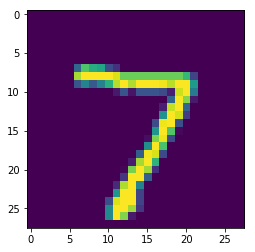

In [85]:
plt.imshow(x_test[0])